<a href="https://colab.research.google.com/github/Macharia-254/WK-4-IP/blob/main/Newton_Macharia_Week_4_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Week 4 Independent Project*
As a data scientist working for an electric car-sharing service company, I have been tasked to process stations data to understand electric car usage over time by finding answers to the analysis questions above. The main reseach question being to identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

In [25]:
#Loadong the libraries we will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Dictating the plotting parameters
sns.set()
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [58]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

In [27]:
# Loading the autolib dataset
autolib_df = pd.read_csv('Autolib_dataset (2).csv', encoding='utf8')

In [28]:
# Preview the data from the top
autolib_df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [29]:
#Previewing the last few rows of the data
autolib_df.tail()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27
4999,5 Rue Henry Brisson,4,4,0,0,0,operational,Paris,NaN,paris-henrybrisson-5,STATION,"48.8984293, 2.3347923",75018,Paris/Henry Brisson/5,operational,NaN,0,station,ok,nonexistent,2018,4,8,10,2


In [30]:
#Taking a random sample of ten rows in the dataset
autolib_df.sample(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
2022,102 Boulevard Raymond PoincarÃ©,5,5,0,0,0,nonexistent,Garches,NaN,garches-raymondpoincare-102,STATION,"48.838861, 2.1725502",92380,Garches/Raymond PoincarÃ©/102,operational,NaN,1,station,ok,nonexistent,2018,4,5,18,3
3071,1 avenue Philippe Auguste,5,5,0,0,0,operational,Paris,NaN,paris-philippeauguste-1,STATION,"48.8493744, 2.395332",75011,Paris/Philippe Auguste/1,operational,NaN,0,station,ok,nonexistent,2018,4,6,5,40
4152,12 avenue de la gare,0,0,0,0,0,nonexistent,BiÃ¨vres,NaN,bievres-gare-12,STATION,"48.7521371, 2.2163546",91570,BiÃ¨vres/Gare/12,future,2016-07-27T15:32:21,0,station,scheduled,nonexistent,2018,4,8,3,54
1192,42 avenue de Friedland,0,0,0,0,0,nonexistent,Paris,NaN,paris-friedland-42,STATION,"48.8741642, 2.2976358",75008,Paris/Friedland/42,operational,NaN,4,station,ok,nonexistent,2018,4,6,2,41
106,126 rue de Colombes,1,1,0,0,0,nonexistent,La Garenne-Colombes,NaN,lagarennecolombes-colombes-126,STATION,"48.9047803, 2.2558349",92250,La Garenne-Colombes/Colombes/126,operational,NaN,6,station,ok,nonexistent,2018,4,1,9,58
337,105 Rue de Rennes,0,0,0,1,0,nonexistent,Paris,NaN,paris-rennes-105,STATION,"48.8489613, 2.3287351",75006,Paris/Rennes/105,operational,NaN,1,station,ok,nonexistent,2018,4,6,17,27
2664,20 Rue Villiot,0,0,0,0,0,broken,Paris,NaN,paris-villiot-20,SPACE,"48.841876, 2.375976",75012,Paris/Villiot/20,broken,NaN,0,full_station,closed,broken,2018,4,6,4,12
2215,52 rue Charles Hermite,0,0,0,0,0,broken,Paris,NaN,paris-charleshermite-52,STATION,"48.8990509, 2.3649827",75018,Paris/Charles Hermite/52,broken,NaN,0,station,closed,nonexistent,2018,4,7,13,41
4975,91 Rue du Faubourg Saint-HonorÃ©,0,0,0,0,0,broken,Paris,NaN,paris-sainthonore-91,STATION,"48.872047, 2.3131252",75008,Paris/Saint-HonorÃ©/91,broken,NaN,0,station,closed,nonexistent,2018,4,3,1,21
4220,2 Rue de Rungis,3,3,1,0,0,operational,Paris,NaN,paris-rungis-2,STATION,"48.82195, 2.345853",75013,Paris/Rungis/2,operational,NaN,1,station,ok,nonexistent,2018,4,7,15,26


In [31]:
# Getting information on the dataset
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [32]:
# Finding out the number of rows and columns in the data frame
autolib_df.shape

(5000, 25)

In [33]:
# Droping the columns with very few non-missing values
autolib_df.drop(['Displayed comment', 'Scheduled at'], axis=1, inplace=True)

In [34]:
# Use a for function to rename the necessary columns
col_names = autolib_df.columns.tolist()
for col in range(len(col_names)):
  col_names[col] = col_names[col].lower().replace(" ", "_")

autolib_df.columns = col_names

In [35]:
# Check for duplicates in the data
autolib_df.duplicated().any()

False

In [36]:
# Check for missing values
autolib_df.isnull().sum().sort_values(ascending=False)

minute                 0
geo_point              0
cars                   0
bluecar_counter        0
utilib_counter         0
utilib_1.4_counter     0
charge_slots           0
charging_status        0
city                   0
id                     0
kind                   0
postal_code            0
hour                   0
public_name            0
rental_status          0
slots                  0
station_type           0
status                 0
subscription_status    0
year                   0
month                  0
day                    0
address                0
dtype: int64

In [37]:
# Checking the respective column datatypes
autolib_df.dtypes

address                object
cars                    int64
bluecar_counter         int64
utilib_counter          int64
utilib_1.4_counter      int64
charge_slots            int64
charging_status        object
city                   object
id                     object
kind                   object
geo_point              object
postal_code             int64
public_name            object
rental_status          object
slots                   int64
station_type           object
status                 object
subscription_status    object
year                    int64
month                   int64
day                     int64
hour                    int64
minute                  int64
dtype: object

In [38]:
# Extract paris data from the data frame
paris_df = autolib_df[autolib_df.city == 'Paris']

In [39]:
# Shape of paris dataframe
paris_df.shape

(2816, 23)

In [40]:
# Create date feature
paris_df['date'] = paris_df[paris_df.columns[18:21]].apply(lambda x: '/'.join(x.astype(str)), axis=1)

In [41]:
# Create time feature
paris_df['time'] = paris_df[paris_df.columns[21:23]].apply(lambda x: ":".join(x.astype(str)), axis = 1)

In [42]:
# Create date time feature
paris_df['datetime'] = paris_df[paris_df.columns[23:]].apply(lambda x: " ".join(x.astype(str)), axis = 1)

In [43]:
# Covert datetime feature to datetime
paris_df.datetime = pd.to_datetime(paris_df.datetime)

In [44]:
# Finding put how many unique stations are there in paris?
paris_df.id.unique()

array(['paris-suffren-2', 'paris-raymondlosserand-145',
       'paris-eugeneoudine-51', 'paris-portedechamperret-6',
       'paris-voltaire-8', 'paris-citroencevennes-parking',
       'paris-jeanmoulin-34', 'paris-anvers-parking', 'paris-censier-14',
       'paris-richardlenoir-8', 'paris-voltaire-182',
       'paris-cambronne-parking', 'paris-renecoty-11',
       'paris-catalogne-2', 'paris-emiledeschanel-15',
       'paris-faubourgsaintmartin-203', 'paris-danton-8',
       'paris-boucry-35', 'paris-pontlouisphilippe-24',
       'paris-miollis-21', 'paris-sorbier-14', 'paris-londres-6',
       'paris-fredericklemaitre-5', 'paris-clichy-70', 'paris-mozart-68',
       'paris-claudebernard-16', 'paris-georgesmandel-42',
       'paris-grandearmee-81', 'paris-reille-59', 'paris-tolbiac-41',
       'paris-fabredeglantine-2', 'paris-republique-17',
       'paris-sevresbabylone-parking', 'paris-raymondlosserand-229',
       'paris-murat-1', 'paris-pompe-137', 'paris-guypatin-10',
       'pari

In [47]:
# A vehicle can only be picked up from stations with an operational rental status.
# The station can be of any kind other than center, station type can either be station, 
# full_station, station status can either be ok or closed
# Filter out stations without operational rental status
available_stations = paris_df[paris_df.rental_status == 'operational']
#Filter out stations with center kind
available_stations = available_stations[available_stations.kind != 'CENTER']
# Filter out stations with subs_center station type
available_stations = available_stations[available_stations.station_type != 'subs_center']
# Filter out stations with a scheduled status
available_stations = available_stations[available_stations.status != 'scheduled']

In [48]:
# Getting the shape of the available stations
available_stations.shape

(2629, 26)

In [49]:
# Check the number of occurrences for each station
station_occurences = available_stations.id.value_counts(ascending=False)
station_occurences

paris-portedemontrouge-8     13
paris-courcelles-69          11
paris-voltaire-182           11
paris-mathis-35              11
paris-philippeauguste-126    11
                             ..
paris-murat-157               1
paris-portepouchet-6          1
paris-pastourelle-27          1
paris-claudedecaen-26         1
paris-pauldoumer-72           1
Name: id, Length: 567, dtype: int64

In [51]:
# Get names of stations that occur more than once to gain only the relevant stations
stations_active = station_occurences[station_occurences > 1 ].index.tolist()
# Filtering dataframe to contain only active stations
available_stations = available_stations[available_stations['id'].isin(stations_active)]
available_stations.head()

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute,date,time,datetime
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,2018/4/8,11:43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,2018/4/6,7:24,2018-04-06 07:24:00
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,2018/4/4,4:37,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,2018/4/8,17:23,2018-04-08 17:23:00
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,4,station,ok,nonexistent,2018,4,6,7,2,2018/4/6,7:2,2018-04-06 07:02:00


In [52]:
# Create dataframe with blue car data
blue_car_flow = available_stations[['postal_code','bluecar_counter','id','datetime']]
# Sort data by id and datetime column
blue_car_flow = blue_car_flow.sort_values(by=['id','datetime'])
blue_car_flow.head()

,postal_code,bluecar_counter,id,datetime
710,75014,1,paris-25aout1944-8,2018-04-01 18:40:00
1891,75014,4,paris-25aout1944-8,2018-04-02 07:37:00
2312,75014,2,paris-25aout1944-8,2018-04-02 12:49:00
911,75014,3,paris-25aout1944-8,2018-04-04 03:10:00
4940,75014,1,paris-25aout1944-8,2018-04-04 18:48:00


In [53]:
# Create a column which constitutes difference in the rows
blue_car_flow['diff'] = blue_car_flow.groupby(['id'])['bluecar_counter'].diff().fillna(0)
blue_car_flow

,postal_code,bluecar_counter,id,datetime,diff
710,75014,1,paris-25aout1944-8,2018-04-01 18:40:00,0.0
1891,75014,4,paris-25aout1944-8,2018-04-02 07:37:00,3.0
2312,75014,2,paris-25aout1944-8,2018-04-02 12:49:00,-2.0
911,75014,3,paris-25aout1944-8,2018-04-04 03:10:00,1.0
4940,75014,1,paris-25aout1944-8,2018-04-04 18:48:00,-2.0
...,...,...,...,...,...
3622,75013,3,paris-vulpian-24,2018-04-08 22:24:00,2.0
2110,75013,1,paris-vulpian-24,2018-04-09 12:58:00,-2.0
3055,75013,2,paris-vulpian-24,2018-04-09 23:32:00,1.0
2329,75017,0,paris-wagram-77,2018-04-05 20:24:00,0.0


In [54]:
# Create a hour variable
blue_car_flow['hour'] = blue_car_flow.datetime.dt.hour
# Create a pickups only dataframe
bluecar_pickups = blue_car_flow[blue_car_flow['diff'] < 0]
bluecar_pickups.head()

,postal_code,bluecar_counter,id,datetime,diff,hour
2312,75014,2,paris-25aout1944-8,2018-04-02 12:49:00,-2.0,12
4940,75014,1,paris-25aout1944-8,2018-04-04 18:48:00,-2.0,18
2848,75014,0,paris-25aout1944-8,2018-04-09 05:23:00,-1.0,5
294,75009,0,paris-adolphemax-6,2018-04-07 16:47:00,-4.0,16
2738,75019,2,paris-adolphemille-8,2018-04-04 18:23:00,-2.0,18


In [55]:
# Getting the shape of the pickups data frame
bluecar_pickups.shape

(758, 6)

In [56]:
# To get the most popular hour
bluecar_pickups.hour.value_counts().sort_values(ascending=False)

21    44
17    41
16    39
10    39
23    37
8     37
18    37
22    36
15    36
20    35
11    32
3     31
2     30
4     29
12    28
5     28
1     28
7     27
6     27
14    26
19    26
13    25
0     23
9     17
Name: hour, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

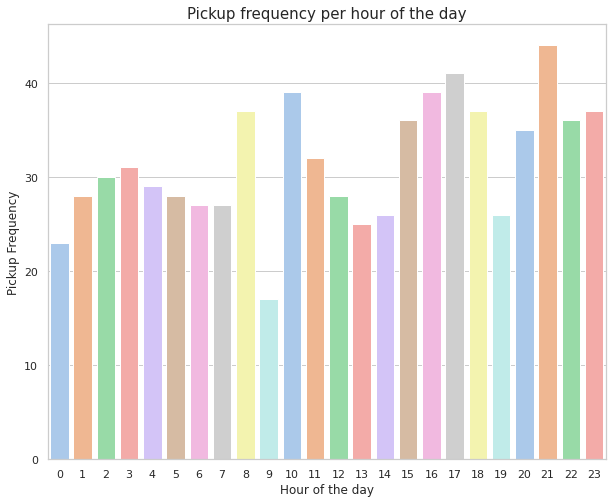

In [59]:
# Plotting a bar chart for the frequency per hour of the day
sns.set(style='whitegrid')
y_ax =  bluecar_pickups.hour.value_counts().sort_values(ascending=False)
x_ax =  y_ax.index
frequency = plt.figure()
sns.barplot(x= x_ax, y= y_ax, palette='pastel')
plt.xlabel('Hour of the day')
plt.ylabel('Pickup Frequency')
plt.title('Pickup frequency per hour of the day',fontdict={'fontsize':15})
plt.savefig("frequency.png")
files.download('frequency.png')

In [60]:
#From the graph above, most pickups occur at 9:00 pm - 10:00 pm
# Create dataframe consisting of only drop offs
bluecar_dropoffs = blue_car_flow[blue_car_flow['diff'] > 0]
bluecar_dropoffs.head()

,postal_code,bluecar_counter,id,datetime,diff,hour
1891,75014,4,paris-25aout1944-8,2018-04-02 07:37:00,3.0,7
911,75014,3,paris-25aout1944-8,2018-04-04 03:10:00,1.0,3
586,75014,1,paris-25aout1944-8,2018-04-09 20:53:00,1.0,20
1424,75019,2,paris-adolphemille-8,2018-04-03 12:25:00,1.0,12
4343,75019,4,paris-adolphemille-8,2018-04-03 21:53:00,2.0,21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

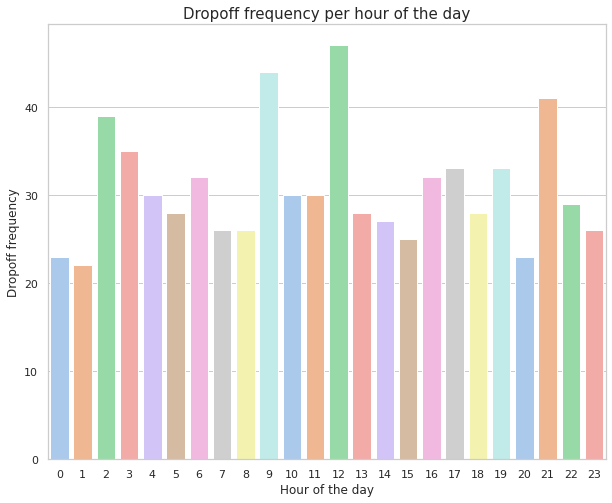

In [61]:
# Determine most popular hour for dropoffs
bluecar_dropoffs.hour.value_counts().sort_values(ascending=False)
# Plot dropoff frequency
y_val = bluecar_dropoffs.hour.value_counts().sort_values(ascending=False)
x_val = y_val.index
sns.barplot(x = x_val, y=y_val, palette='pastel')
plt.xlabel('Hour of the day')
plt.ylabel('Dropoff frequency')
plt.title('Dropoff frequency per hour of the day',fontdict={'fontsize':15})
plt.savefig("dropoff.png")
files.download('dropoff.png')

In [62]:
#Most drop offs occur between 12:00 - 1:00 pm
#Determine the most popular station
#Based on pickups
popular_pickup = bluecar_pickups.id.value_counts().head(1).index[0]
paris_df.loc[paris_df['id'] == popular_pickup ,'public_name'].iloc[0]

'Paris/Porte de Montrouge/8'

In [63]:
#Based on dropoffs
popular_dropoff = bluecar_dropoffs.id.value_counts().head(1).index[0]
paris_df.loc[paris_df['id'] == popular_dropoff,'public_name'].iloc[0]

'Paris/Voltaire/182'

In [64]:
#Based on both pickups and dropoffs
paris_df.public_name.value_counts().index[0]

'Paris/Porte de Montrouge/8'

In [65]:
# Determine most popular station at pickup hour
bluecar_pickups[bluecar_pickups.hour == 21]['id'].value_counts()

paris-mozart-68                   2
paris-hopital-47                  2
paris-goubet-8                    1
paris-danton-8                    1
paris-victoire-76                 1
paris-voltaire-182                1
paris-berri-10                    1
paris-theophilegauthier-14        1
paris-marceau-59                  1
paris-fabredeglantine-2           1
paris-batignolles-27              1
paris-tronchet-19                 1
paris-jouffroydabbans-14          1
paris-ternes-parking              1
paris-pernety-46                  1
paris-boulard-1                   1
paris-victorhugo-93               1
paris-parmentier-125              1
paris-lorraine-22                 1
paris-picpus-122                  1
paris-duroc-2                     1
paris-segur-55                    1
paris-tolbiac-189                 1
paris-daviddangers-54             1
paris-jeannedarc-157              1
paris-faubourgsaintantoine-199    1
paris-portedaubervilliers-10      1
paris-caillaux-24           

In [66]:
# Getting the station names
paris_df.loc[paris_df.id == 'paris-hopital-47','public_name'].iloc[0]

'Paris/HÃ´pital/47'

In [67]:
paris_df.loc[paris_df.id == 'paris-mozart-68','public_name'].iloc[0]

'Paris/Mozart/68'

In [68]:
# Determine most popular postcode for picking up blue cars
bluecar_pickups.postal_code.value_counts().index[0]

75015

In [73]:
#Get stations that belong to most popular postal code
postalcode_stations = paris_df.loc[paris_df.postal_code == 75015, 'id'].unique()
postalcode_stations

array(['paris-suffren-2', 'paris-citroencevennes-parking',
       'paris-cambronne-parking', 'paris-miollis-21',
       'paris-colonelpierreavia-1', 'paris-convention-171',
       'paris-emilezola-6', 'paris-gerbert-11', 'paris-grenelle-139',
       'paris-vaugirard-20', 'paris-balard-108', 'paris-dantzig-80',
       'paris-olier-15', 'paris-emilezola-65', 'paris-paulbarruel-44',
       'paris-houdartdelamotte-2', 'paris-grenelle31-parking',
       'paris-commerce-5', 'paris-lacordaire-56', 'paris-grenelle-37',
       'paris-croixnivert-192', 'paris-leblanc-19', 'paris-vouille-47',
       'paris-suffren-78', 'paris-suffren-44', 'paris-jeansicard-1',
       'paris-vaugirard-230', 'paris-convention-75', 'paris-pasteur-41',
       'paris-pasteurmontparnasse-parking', 'paris-balard-18',
       'paris-mademoiselle-22', 'paris-emilezola-143',
       'paris-garibaldicambronne-parking', 'paris-maine-4',
       'paris-felixfaure-109', 'paris-morillons-95',
       'paris-lecourbemairieduxveme-pa

In [71]:
# Check if most popular station is in this postcode
if "Paris/Porte de Montrouge/8" in postalcode_stations:
  print(True)
else:
  print(False)

False


In [72]:
#Most popular postal code at the most popular picking hour
bluecar_pickups[bluecar_pickups.hour == 21].postal_code.value_counts().index[0]

75016